# Dataset G profiling
Dataset columns are printed with their standardized distribution. Pandas-profiling (https://github.com/pandas-profiling/pandas-profiling) is used to display relevant metrics.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import src.core_stateless as statelessApi
from src.core import valueDistribution 
from src.core_configs import getConfigG

Using TensorFlow backend.


In [2]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = getConfigG("30min")

relevantColumns, columnDescriptions, columnUnits, columnNames, df = statelessApi.initDataframe(
    filename,
    columns,
    irrelevantColumns,
)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference



# Value Distribution
On the left, plots of the standardized sample points for each column can be seen. On the right, a distribution of the standardized values is shown. Training points are plotted in dark blue, while testing points are light blue. Vertical lines enclose the training period, with black indicating the beginning and blue indicating the end of the training period.

Notice how the Coolant Inlet Temperature is varying with the seasons of the year, with cold temperatures in the winter and hot temperatures in the summer. The same, although to a somewhat lesser degree, is seen in the Coolant Outlet Temperature. The operating point of the Process Inlet Temperature seems to have shifted somewhat in the spring of 2018, indicating some changes to the facility. Some features, such as Process Pressure Difference, Process Inlet Temperature, Coolant Outlet Temperature and Coolant Valve Opening do not have similar distributions for training and test data. Do however note that the testing period is much longer than the training period, suggesting several changes to the processing plant may have happened throughout this time.

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows



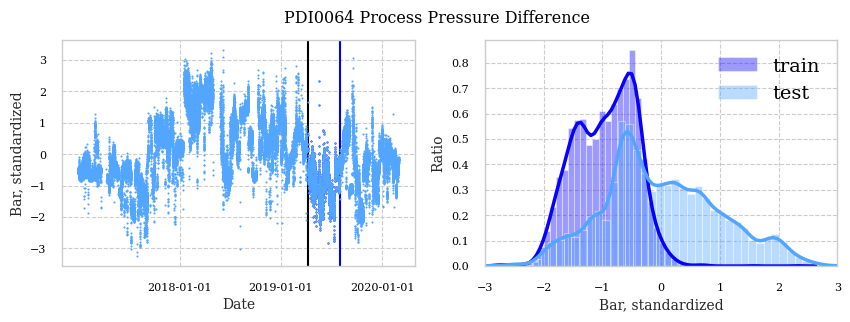

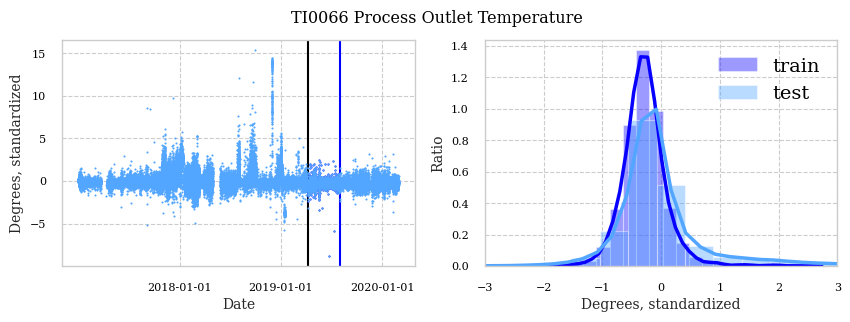

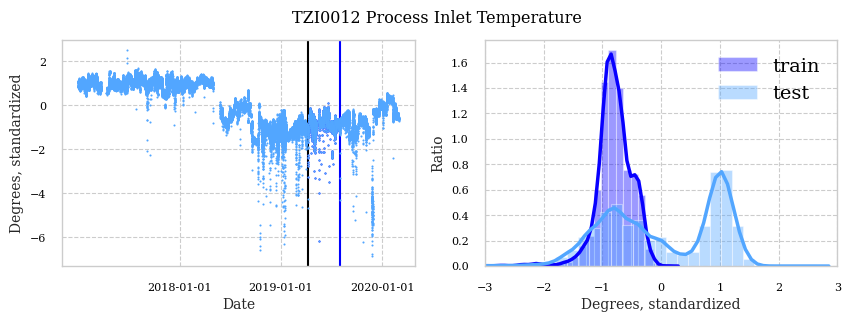

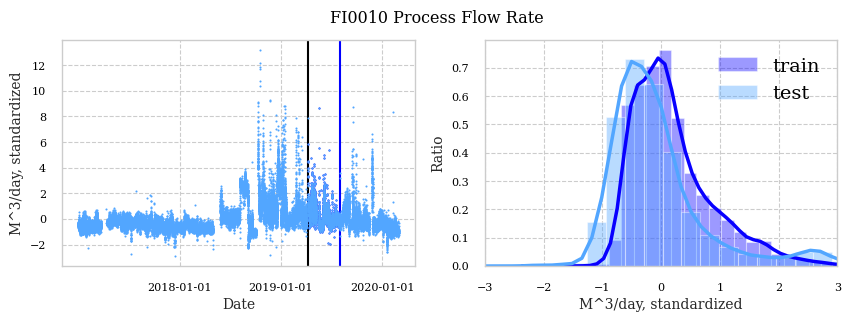

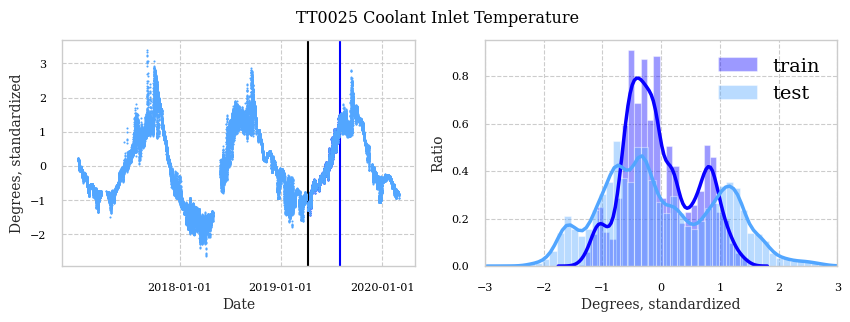

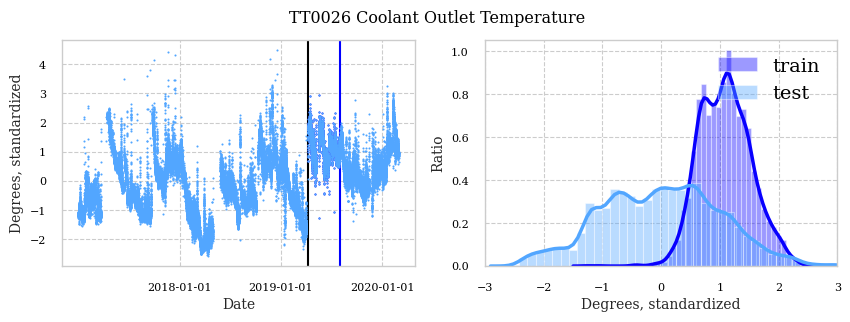

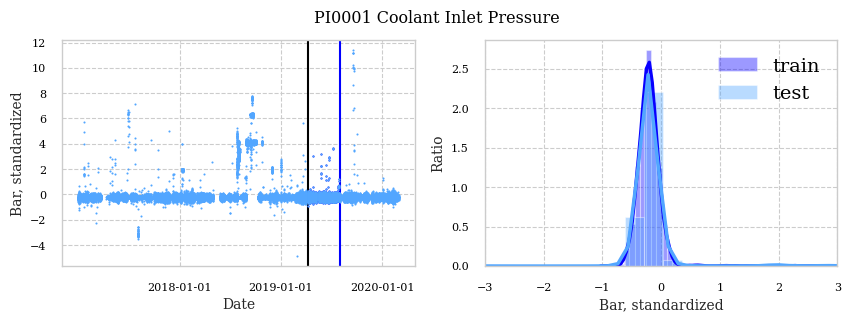

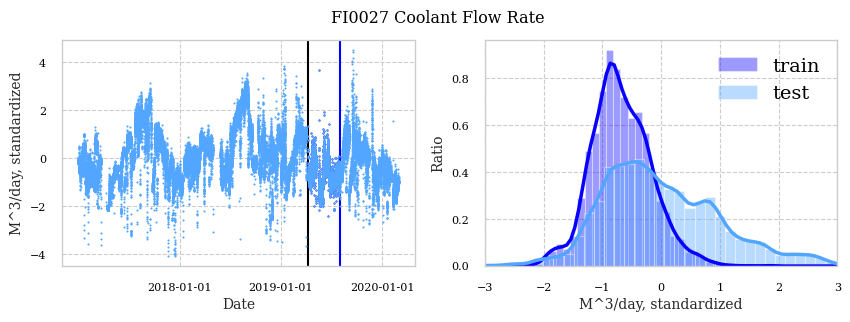

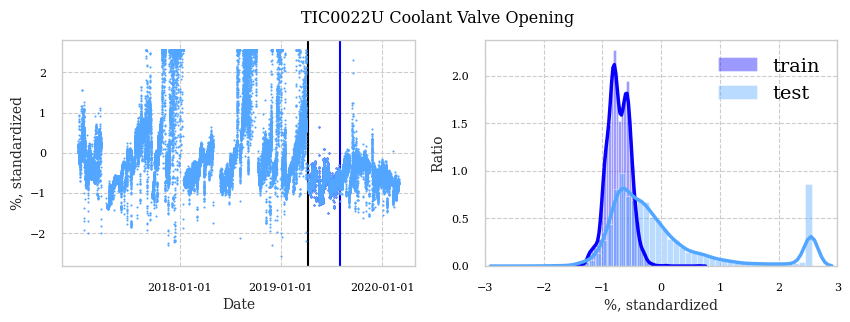

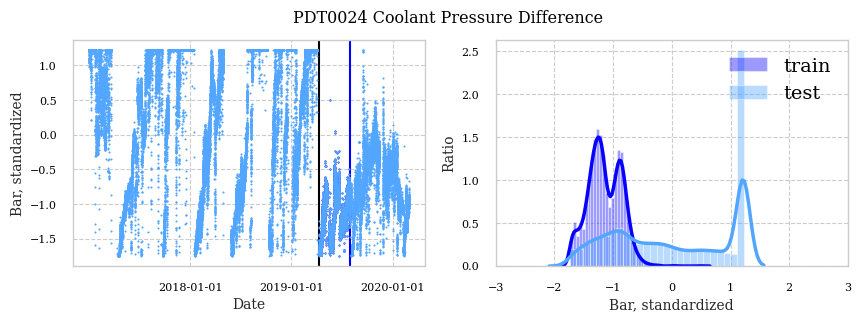

In [3]:
valueDistribution(df, traintime, testtime, columnDescriptions, columnUnits)

# Profiling
Pandas profiling offers detailed information about the provided dataset. Metrics such as missing cells, memory size, column uniqueness and column correlation can be seen.

NB: not visible from GitHub, see https://htmlpreview.github.io/?https://github.com/hermanwh/master-thesis/blob/master/profiling/dataset_profiling_G.html

In [4]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report.to_file(output_file="profiling/dataset_profiling_G.html")
report

In short, the profiling tool tells us that:
- There are no missing cells or duplicate rows in the dataset, indicating it can be used for machine learning algorithms
- Process Outlet Temperature is rather consistent around the mean with a small variance, indicating the gas is mostly cooled as intented
- The Process Inlet Temperature has changed operating point throughout the dataset